In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasets = tf.keras.datasets.mnist.load_data()

In [3]:
datasets

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(train_images,train_labels),(test_images,test_labels) = datasets

In [5]:
train_images.shape

(60000, 28, 28)

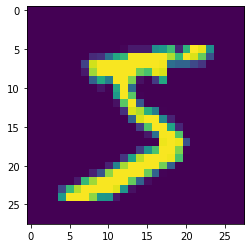

In [6]:
plt.imshow(train_images[0])

In [7]:
train_labels[0]

5

In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
train_images = np.expand_dims(train_images,axis=-1)
test_images = np.expand_dims(test_images,axis=-1)

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
train_images = tf.cast(train_images/255,dtype=tf.float32)
test_images = tf.cast(test_images/255,dtype=tf.float32)

In [12]:
BATCH_SIZE = 256
BUFFER_SIZE = len(train_images)

In [ ]:
#*在循环开始时初始化metrics
#*每个batch后更新metrics *metrics.result()需要显示metrics当前值时调用
#*metrics.reset_states()需要清除metrics状态时调用(在每个epoch末尾或者下个epoch开始前）

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labelsbatch
#data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset


<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

In [38]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(BATCH_SIZE)
test_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

In [15]:
class CnnModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.con_2D_1 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(BATCH_SIZE,28,28,1))
        self.con_2D_2 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')
        self.max_pooling_1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.con_2D_3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')
        self.con_2D_4 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')
        self.max_pooling_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense_1 = tf.keras.layers.Dense(256,activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.dense_2 = tf.keras.layers.Dense(10,activation='softmax')
        
    def call(self,x):
        x = self.con_2D_1(x)
        x = self.con_2D_2(x)
        x = self.max_pooling_1(x)
        x = self.con_2D_3(x)
        x = self.con_2D_4(x)
        x = self.max_pooling_2(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x
    def summary(self):
        x_input = tf.keras.Input(shape=(28,28,1) )
        output = self.call(x_input)
        model = tf.keras.Model(inputs = x_input,outputs = output)
        model.summary()

In [16]:
model = CnnModel()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0     

In [17]:
optimizer = tf.keras.optimizers.Adam()
object_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [29]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [30]:
@tf.function
def train_step(images,labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        losses = object_loss(labels,predictions)
        gradient = tape.gradient(losses,model.trainable_variables)
        optimizer.apply_gradients(zip(gradient,model.trainable_variables))
        
        train_loss(losses)
        train_accuracy(labels, predictions)

In [40]:
@tf.function
def test_step(images,labels):
    predictions = model(images)
    t_loss = object_loss(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [32]:
EPOCHS = 5

In [36]:
def train(train_dataset,test_dataset,epochs):
    for epoch in range (epochs):
         # 在下一个epoch开始时，重置评估指标
        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()

        for (train_images,train_labels) in train_dataset:
            train_step(train_images,train_labels)
            
        for test_images, test_labels in test_dataset:
            test_step(test_images,test_labels)
            
        #print("epoch:{}".format(epoch+1))
        template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
        print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))
    

In [41]:
train(train_dataset,test_dataset,EPOCHS)

Epoch 1, Loss: 0.006547682452946901, Accuracy: 99.79666137695312, Test Loss: 0.02413124032318592, Test Accuracy: 99.26000213623047
Epoch 2, Loss: 0.004635941237211227, Accuracy: 99.84500122070312, Test Loss: 0.026477843523025513, Test Accuracy: 99.30999755859375
Epoch 3, Loss: 0.004629829898476601, Accuracy: 99.83999633789062, Test Loss: 0.032325126230716705, Test Accuracy: 99.15999603271484
Epoch 4, Loss: 0.006450206972658634, Accuracy: 99.78500366210938, Test Loss: 0.03077111765742302, Test Accuracy: 99.16999816894531
Epoch 5, Loss: 0.004819122143089771, Accuracy: 99.82666015625, Test Loss: 0.028157100081443787, Test Accuracy: 99.36000061035156


In [42]:
# f(x) = a*x**2 + b*x + c的导数
x = tf.Variable(0.0,name = "x",dtype = tf.float32)
a = tf.constant(1.0)
b = tf.constant(-2.0)
c = tf.constant(1.0)

with tf.GradientTape() as tape:
    y = a*tf.pow(x,2) + b*x + c
    
dy_dx = tape.gradient(y,x)
print(dy_dx)

tf.Tensor(-2.0, shape=(), dtype=float32)


In [43]:
# 求f(x) = a*x**2 + b*x + c的最小值
# 使用optimizer.apply_gradients

x = tf.Variable(0.0,name = "x",dtype = tf.float32)
a = tf.constant(1.0)
b = tf.constant(-2.0)
c = tf.constant(1.0)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for _ in range(1000):
    with tf.GradientTape() as tape:
        y = a*tf.pow(x,2) + b*x + c
    dy_dx = tape.gradient(y,x)
    optimizer.apply_gradients(grads_and_vars=[(dy_dx,x)])
    
tf.print("y =",y,"; x =",x)

y = 0 ; x = 0.999998569
